In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv(r'C:\Users\tanvi\Documents\Tanvi_Jain_A1\laptop_price_task\data\Laptop Price.csv')  # replace with your file path

def manual_label_encode(series):
    unique_vals = series.unique()
    mapping = {val: idx for idx, val in enumerate(unique_vals)}
    return series.map(mapping), mapping

for col in ['Company', 'TypeName', 'OpSys']:
    df[col], mapping = manual_label_encode(df[col])

df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

df['X_res'] = df['ScreenResolution'].str.split('x').str[0].str.extract(r'(\d+)').astype(int)
df['Y_res'] = df['ScreenResolution'].str.split('x').str[1].str.extract(r'(\d+)').astype(int)

df.drop('ScreenResolution', axis=1, inplace=True)

df['Cpu_brand'] = df['Cpu'].apply(lambda x: x.split()[0])
df['Cpu_type'] = df['Cpu'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else 'Other')

df['Cpu_speed'] = df['Cpu'].str.extract(r'(\d+\.?\d*)GHz')[0].astype(float).fillna(0)

df['Cpu_brand'], _ = manual_label_encode(df['Cpu_brand'])
df['Cpu_type'], _ = manual_label_encode(df['Cpu_type'])

df.drop('Cpu', axis=1, inplace=True)

df['Gpu_brand'] = df['Gpu'].apply(lambda x: x.split()[0])
df['Gpu_brand'], _ = manual_label_encode(df['Gpu_brand'])
df.drop('Gpu', axis=1, inplace=True)

def parse_memory(mem_str):
    ssd = hdd = 0
    mem_str = mem_str.replace('GB', ' GB').replace('TB', ' TB')
    parts = mem_str.split('+')
    
    for part in parts:
        part = part.strip()
        # SSD
        if 'SSD' in part:
            size_str = part.split()[0]
            if 'TB' in part:
                size = int(float(size_str) * 1000)
            else:
                size = int(float(size_str))
            ssd = size
        # HDD
        elif 'HDD' in part:
            size_str = part.split()[0]
            if 'TB' in part:
                size = int(float(size_str) * 1000)
            else:
                size = int(float(size_str))
            hdd = size
    return pd.Series([ssd, hdd])

df[['SSD', 'HDD']] = df['Memory'].apply(parse_memory)
df.drop('Memory', axis=1, inplace=True)

df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)


df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)


print(df.head())
print("\nData types:\n", df.dtypes)


   Company  TypeName  Inches  Ram  OpSys  Weight       Price  Touchscreen  \
0        0         0    15.6    8      0    2.50   52161.120            0   
1        1         0    14.0    4      1    1.50   14811.840            0   
2        2         0    15.6    4      0    2.20   14646.672            0   
3        3         1    14.0   16      1    1.42  150462.720            1   
4        0         0    15.6    4      1    2.40   23976.000            0   

   IPS  X_res  Y_res  Cpu_brand  Cpu_type  Cpu_speed  Gpu_brand   SSD  HDD  
0    0   1920   1080          0         0        2.8          0   256    0  
1    0   1366    768          0         1        1.1          1     0    0  
2    0   1366    768          0         1        1.6          1     0  500  
3    0   2560   1440          0         0        2.7          1  1000    0  
4    0   1366    768          0         0        2.0          1     0  500  

Data types:
 Company          int64
TypeName         int64
Inches         

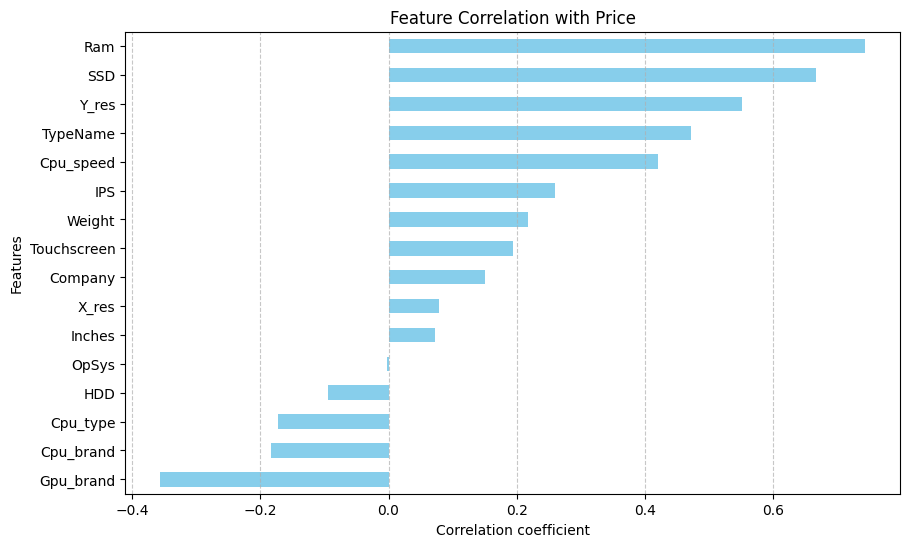

In [ ]:
import matplotlib.pyplot as plt


correlations = df.corr()['Price'].sort_values()


plt.figure(figsize=(10,6))
correlations.drop('Price').plot(kind='barh', color='skyblue')
plt.title('Feature Correlation with Price')
plt.xlabel('Correlation coefficient')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


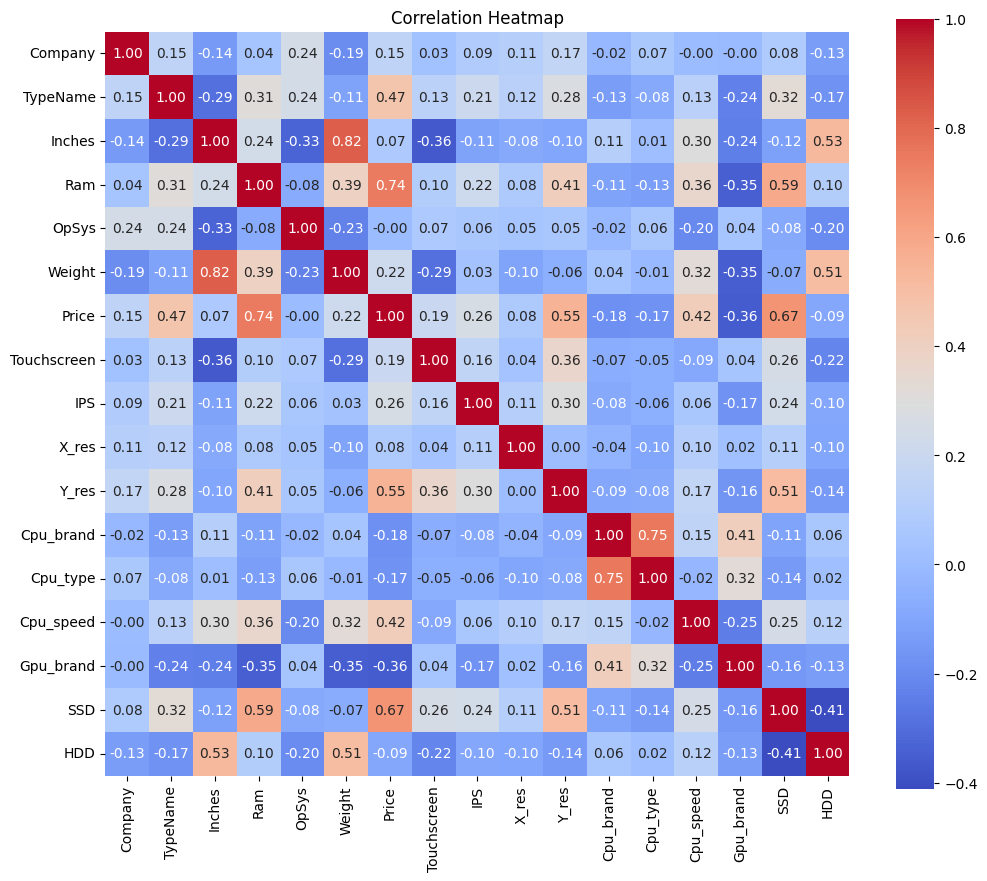

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()


plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.show()



Intercept: 13774.58, Slope: 5519.90


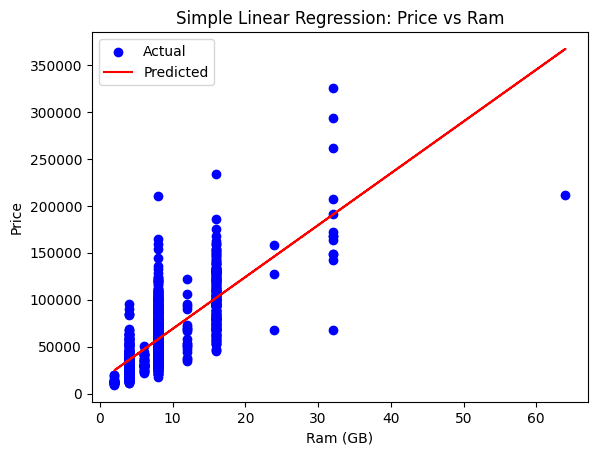

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = df['Ram'].values  
y = df['Price'].values  


X_b = np.c_[np.ones((len(X), 1)), X]  


theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

intercept = theta[0]
slope = theta[1]
print(f"Intercept: {intercept:.2f}, Slope: {slope:.2f}")


y_pred = X_b.dot(theta)

plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.xlabel('Ram (GB)')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Price vs Ram')
plt.legend()
plt.show()


In [ ]:

X = df.drop('Price', axis=1).values
y = df['Price'].values


X_b = np.c_[np.ones((len(X), 1)), X]


theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print("Coefficients for all features:")
for col, coef in zip(['Intercept'] + list(df.drop('Price', axis=1).columns), theta):
    print(f"{col}: {coef:.2f}")


Coefficients for all features:
Intercept: -42821.51
Company: 1069.34
TypeName: 5194.69
Inches: -220.92
Ram: 2570.37
OpSys: 925.94
Weight: 7419.30
Touchscreen: 5390.77
IPS: -201.77
X_res: -1.64
Y_res: 21.38
Cpu_brand: -22299.40
Cpu_type: 703.06
Cpu_speed: 13339.09
Gpu_brand: 78.16
SSD: 51.08
HDD: -1.71


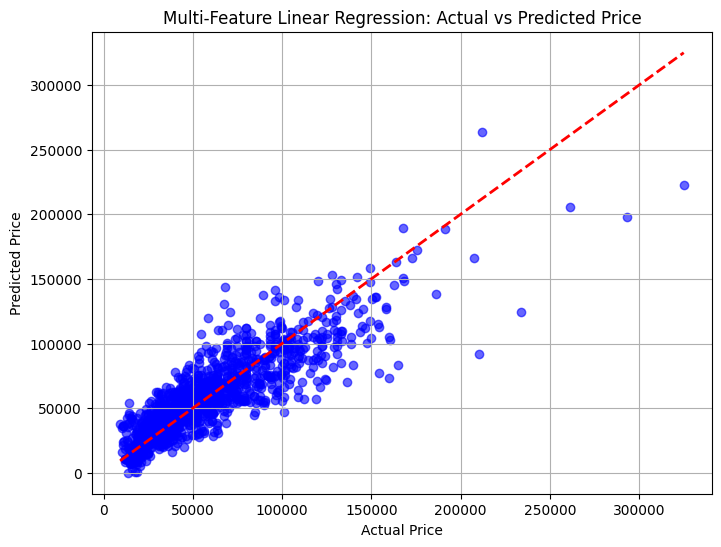

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


X = df.drop('Price', axis=1).values
y = df['Price'].values

X_b = np.c_[np.ones((len(X), 1)), X]


theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

y_pred = X_b.dot(theta)

plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)  # Perfect fit line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Multi-Feature Linear Regression: Actual vs Predicted Price')
plt.grid(True)
plt.show()


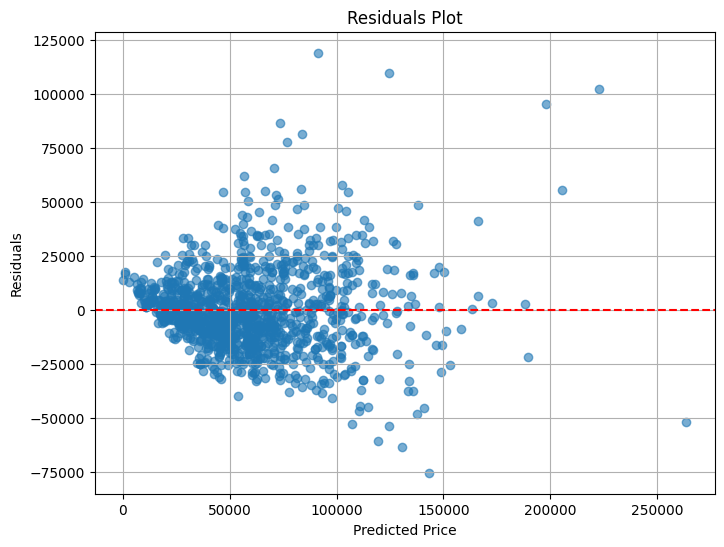

In [64]:
residuals = y - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np


X = df.drop('Price', axis=1).values
y = df['Price'].values


X_b = np.c_[np.ones((len(X), 1)), X]


theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


y_pred = X_b.dot(theta)

mse = np.mean((y - y_pred)**2)

rmse = np.sqrt(mse)

r2 = 1 - np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")


MSE: 360779926.26
RMSE: 18994.21
R²: 0.7427


In [ ]:

y_log = np.log1p(df['Price'].values)  

theta_log = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_log)

y_log_pred = X_b.dot(theta_log)

y_pred_exp = np.expm1(y_log_pred)

mse_log = np.mean((df['Price'].values - y_pred_exp)**2)
rmse_log = np.sqrt(mse_log)
r2_log = 1 - np.sum((df['Price'].values - y_pred_exp)**2) / np.sum((df['Price'].values - np.mean(df['Price'].values))**2)

print(f"Log Regression -> MSE: {mse_log:.2f}, RMSE: {rmse_log:.2f}, R²: {r2_log:.4f}")


Log Regression -> MSE: 777913789.38, RMSE: 27891.11, R²: 0.4452


In [ ]:
from itertools import combinations


df['ResArea'] = df['X_res'] * df['Y_res']


X_poly = df.drop('Price', axis=1).values
X_poly_b = np.c_[np.ones((len(X_poly), 1)), X_poly]


theta_poly = np.linalg.inv(X_poly_b.T.dot(X_poly_b)).dot(X_poly_b.T).dot(y)


y_poly_pred = X_poly_b.dot(theta_poly)


mse_poly = np.mean((y - y_poly_pred)**2)
rmse_poly = np.sqrt(mse_poly)
r2_poly = 1 - np.sum((y - y_poly_pred)**2) / np.sum((y - np.mean(y))**2)

print(f"Polynomial Regression -> MSE: {mse_poly:.2f}, RMSE: {rmse_poly:.2f}, R²: {r2_poly:.4f}")


Polynomial Regression -> MSE: 360187131.87, RMSE: 18978.60, R²: 0.7431


In [ ]:
import numpy as np


X = df.drop('Price', axis=1).values
y = df['Price'].values


X_b = np.c_[np.ones((len(X), 1)), X]


alpha = 10 


I = np.eye(X_b.shape[1])
I[0,0] = 0  #


theta_ridge = np.linalg.inv(X_b.T.dot(X_b) + alpha * I).dot(X_b.T).dot(y)


y_ridge_pred = X_b.dot(theta_ridge)


mse_ridge = np.mean((y - y_ridge_pred)**2)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = 1 - np.sum((y - y_ridge_pred)**2) / np.sum((y - np.mean(y))**2)

print(f"Ridge Regression -> MSE: {mse_ridge:.2f}, RMSE: {rmse_ridge:.2f}, R²: {r2_ridge:.4f}")


Ridge Regression -> MSE: 361339144.16, RMSE: 19008.92, R²: 0.7423


In [ ]:
import numpy as np


X = df.drop('Price', axis=1).values
y = df['Price'].values


X_b = np.c_[np.ones((len(X), 1)), X]

I = np.eye(X_b.shape[1])
I[0,0] = 0

alphas = [0, 10, 100, 1000, 5000]
results = []

for alpha in alphas:
    
    theta_ridge = np.linalg.inv(X_b.T.dot(X_b) + alpha * I).dot(X_b.T).dot(y)
    
    
    y_pred = X_b.dot(theta_ridge)
    
   
    mse = np.mean((y - y_pred)**2)
    rmse = np.sqrt(mse)
    r2 = 1 - np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2)
    
    results.append((alpha, mse, rmse, r2))


        

print(f"{'Alpha':>6} | {'MSE':>12} | {'RMSE':>10} | {'R²':>6}")
print("-"*45)
for alpha, mse, rmse, r2 in results:
    print(f"{alpha:6} | {mse:12.2f} | {rmse:10.2f} | {r2:6.4f}")


 Alpha |          MSE |       RMSE |     R²
---------------------------------------------
     0 | 360187131.87 |   18978.60 | 0.7431
    10 | 361339144.16 |   19008.92 | 0.7423
   100 | 370208288.17 |   19240.80 | 0.7360
  1000 | 397525206.63 |   19938.03 | 0.7165
  5000 | 438810822.12 |   20947.81 | 0.6870


In [70]:
df['Price_capped'] = df['Price'].clip(upper=200000)


In [ ]:
import numpy as np


X = df.drop('Price', axis=1).values
y = df['Price'].values


X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_scaled = (X - X_mean) / X_std


X_b = np.c_[np.ones((len(X_scaled), 1)), X_scaled]
y_centered = y - np.mean(y)

alpha = 0.001  
max_iter = 1000
tol = 1e-4

theta = np.zeros(X_b.shape[1])


for iteration in range(max_iter):
    theta_old = theta.copy()
    for j in range(1, X_b.shape[1]):  
        residual = y_centered - X_b.dot(theta) + theta[j]*X_b[:,j]
        rho = np.dot(X_b[:,j], residual)
        
       
        if rho < -alpha/2:
            theta[j] = (rho + alpha/2) / np.sum(X_b[:,j]**2)
        elif rho > alpha/2:
            theta[j] = (rho - alpha/2) / np.sum(X_b[:,j]**2)
        else:
            theta[j] = 0
   
    if np.max(np.abs(theta - theta_old)) < tol:
        break


theta[0] = np.mean(y) - np.sum(theta[1:] * X_mean / X_std)


y_pred_lasso = X_b.dot(theta)

mse_lasso = np.mean((y - y_pred_lasso)**2)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = 1 - np.sum((y - y_pred_lasso)**2) / np.sum((y - np.mean(y))**2)

print(f"Lasso Regression -> MSE: {mse_lasso:.2f}, RMSE: {rmse_lasso:.2f}, R²: {r2_lasso:.4f}")


Lasso Regression -> MSE: 4065501081.12, RMSE: 63761.28, R²: -1.8995


In [ ]:
import numpy as np

def ST(x, u):
    """Soft thresholding of x at level u"""
    return np.sign(x) * np.maximum(np.abs(x) - u, 0.0)

def cd_solver(X, y, alpha, max_iter=100):
    n_samples, n_features = X.shape
    beta = np.zeros(n_features)
    R = y.copy()  
    lc = (X ** 2).sum(axis=0)  

    for t in range(max_iter):
        beta_old = beta.copy()
        for j in range(n_features):
            old = beta[j]
            beta[j] = ST(old + X[:, j].dot(R) / lc[j], alpha / lc[j])

          
            if old != beta[j]:
                R += (old - beta[j]) * X[:, j]

    
        if np.max(np.abs(beta - beta_old)) < 1e-6:
            break

    return beta

X = df.drop('Price', axis=1).values
y = df['Price'].values


X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_scaled = (X - X_mean) / X_std

alpha_max = np.max(np.abs(X_scaled.T.dot(y)))
alpha = alpha_max / 2  
beta = cd_solver(X_scaled, y, alpha, max_iter=500)


intercept = np.mean(y) - np.sum(beta * X_mean / X_std)


y_pred_lasso = intercept + X_scaled.dot(beta)

mse_lasso = np.mean((y - y_pred_lasso)**2)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = 1 - np.sum((y - y_pred_lasso)**2) / np.sum((y - np.mean(y))**2)

print(f"Lasso Regression -> MSE: {mse_lasso:.2f}, RMSE: {rmse_lasso:.2f}, R²: {r2_lasso:.4f}")


Lasso Regression -> MSE: 1319423457.36, RMSE: 36323.87, R²: 0.0590


In [ ]:
import numpy as np


X = df.drop('Price', axis=1).values
y = df['Price'].values.reshape(-1, 1)  
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_scaled = (X - X_mean) / X_std

X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]


theta = np.zeros((X_b.shape[1], 1))


learning_rate = 0.01
n_iterations = 5000

for iteration in range(n_iterations):
    gradients = 2/X_b.shape[0] * X_b.T.dot(X_b.dot(theta) - y)
    theta -= learning_rate * gradients


y_pred = X_b.dot(theta)


mse = np.mean((y - y_pred)**2)
rmse = np.sqrt(mse)
r2 = 1 - np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2)

print(f"Gradient Descent OLS -> MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")


Gradient Descent OLS -> MSE: 21089689.54, RMSE: 4592.35, R²: 0.9850


In [ ]:
import numpy as np


k = 5 
learning_rate = 0.01
n_iterations = 5000

X = df.drop('Price', axis=1).values
y = df['Price'].values.reshape(-1, 1)


np.random.seed(42)
indices = np.random.permutation(len(X))
fold_sizes = len(X) // k

mse_scores = []
rmse_scores = []
r2_scores = []

for i in range(k):
    
    val_idx = indices[i*fold_sizes:(i+1)*fold_sizes]
    train_idx = np.concatenate([indices[:i*fold_sizes], indices[(i+1)*fold_sizes:]])

    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    
    X_mean = X_train.mean(axis=0)
    X_std = X_train.std(axis=0)
    X_train_scaled = (X_train - X_mean) / X_std
    X_val_scaled = (X_val - X_mean) / X_std

    
    X_train_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
    X_val_b = np.c_[np.ones((X_val_scaled.shape[0], 1)), X_val_scaled]

    theta = np.zeros((X_train_b.shape[1], 1))

    
    for iteration in range(n_iterations):
        gradients = 2/X_train_b.shape[0] * X_train_b.T.dot(X_train_b.dot(theta) - y_train)
        theta -= learning_rate * gradients

    
    y_val_pred = X_val_b.dot(theta)

    mse = np.mean((y_val - y_val_pred)**2)
    rmse = np.sqrt(mse)
    r2 = 1 - np.sum((y_val - y_val_pred)**2) / np.sum((y_val - np.mean(y_val))**2)

    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

    
    print(f"Fold {i+1} -> MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")


print("\nAverage across all folds:")
print(f"Average MSE: {np.mean(mse_scores):.2f}")
print(f"Average RMSE: {np.mean(rmse_scores):.2f}")
print(f"Average R²: {np.mean(r2_scores):.4f}")



Fold 1 -> MSE: 6071601.94, RMSE: 2464.06, R²: 0.9954
Fold 2 -> MSE: 4846739.92, RMSE: 2201.53, R²: 0.9963
Fold 3 -> MSE: 58575304.16, RMSE: 7653.45, R²: 0.9583
Fold 4 -> MSE: 8301234.80, RMSE: 2881.19, R²: 0.9939
Fold 5 -> MSE: 41490401.10, RMSE: 6441.30, R²: 0.9747

Average across all folds:
Average MSE: 23857056.38
Average RMSE: 4328.31
Average R²: 0.9837


In [ ]:
import numpy as np


np.random.seed(42)
indices = np.random.permutation(len(df))
train_size = int(0.8 * len(df))

train_idx = indices[:train_size]
test_idx = indices[train_size:]

X = df.drop('Price', axis=1).values
y = df['Price'].values.reshape(-1,1)

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]


X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_train_scaled = (X_train - X_mean) / X_std
X_test_scaled = (X_test - X_mean) / X_std  


In [ ]:
k = 5
indices = np.arange(len(df))
np.random.shuffle(indices)
fold_sizes = len(df) // k
mse_scores = []

for i in range(k):
    test_idx = indices[i*fold_sizes:(i+1)*fold_sizes]
    train_idx = np.concatenate([indices[:i*fold_sizes], indices[(i+1)*fold_sizes:]])
    
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
   
    X_mean = X_train.mean(axis=0)
    X_std = X_train.std(axis=0)
    X_train_scaled = (X_train - X_mean) / X_std
    X_test_scaled = (X_test - X_mean) / X_std
    
    
    X_train_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
    X_test_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]
    
   
    theta = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)
    
    
    y_pred = X_test_b.dot(theta)
    
   
    mse_scores.append(np.mean((y_test - y_pred)**2))

print(f"Average MSE across {k} folds: {np.mean(mse_scores):.2f}")


Average MSE across 5 folds: 23346623.80


In [ ]:
import numpy as np
import pandas as pd


df['ResArea'] = df['X_res'] * df['Y_res']         
df['Inches_Ram'] = df['Inches'] * df['Ram']      
df['Total_Storage'] = df['SSD'] + df['HDD']      




In [ ]:

df['Price_log'] = np.log1p(df['Price'])  


In [ ]:

features = df.drop(columns=['Price', 'Price_log'])
X = features.values
y_log = df['Price_log'].values.reshape(-1,1)


In [ ]:

X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_scaled = (X - X_mean) / X_std


X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]


In [ ]:

theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_log)


y_log_pred = X_b.dot(theta)


y_pred = np.expm1(y_log_pred)


In [ ]:

mse = np.mean((df['Price'].values - y_pred)**2)
rmse = np.sqrt(mse)
r2 = 1 - np.sum((df['Price'].values - y_pred)**2) / np.sum((df['Price'].values - np.mean(df['Price'].values))**2)

print(f"Linear Regression with Log-Target -> MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")


Linear Regression with Log-Target -> MSE: 8774977602.11
RMSE: 93674.85
R²: -7333.7669


In [ ]:
import numpy as np
import pandas as pd


df['ResArea'] = df['X_res'] * df['Y_res']
df['Inches_Ram'] = df['Inches'] * df['Ram']
df['Total_Storage'] = df['SSD'] + df['HDD']


y_log = np.log1p(df['Price'].values).reshape(-1,1)


features = df.drop(columns=['Price', 'Price_log'] if 'Price_log' in df.columns else ['Price'])
X = features.values

X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_scaled = (X - X_mean) / X_std


X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]


alpha = 1000   
I = np.eye(X_b.shape[1])
I[0,0] = 0   

 
theta_ridge = np.linalg.inv(X_b.T.dot(X_b) + alpha * I).dot(X_b.T).dot(y_log)

y_log_pred = X_b.dot(theta_ridge)
y_pred = np.expm1(y_log_pred)  


y_pred = np.clip(y_pred, 0, df['Price'].max()*2)


mse = np.mean((df['Price'].values - y_pred.flatten())**2)
rmse = np.sqrt(mse)
r2 = 1 - np.sum((df['Price'].values - y_pred.flatten())**2) / np.sum((df['Price'].values - np.mean(df['Price'].values))**2)

print(f"Ridge Regression with Log-Target -> MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")


Ridge Regression with Log-Target -> MSE: 339969687.17
RMSE: 18438.27
R²: 0.7575
